# KospiAnalyzer

### Get daily stock price

In [10]:
import module.KospiAnalyzer as ka

ticker = ka.KospiTicker()

naver = ticker.get_daily_price('NAVER', '2018-05-04')
naver.head()

end_date is initialized to '2023-06-17'


,code,date,open,high,low,close,diff,volume
date,,,,,,,,
2018-05-04,035420,2018-05-04,725000,735000,717000,717000,10000,102357
2018-05-08,035420,2018-05-08,727000,738000,721000,731000,14000,97455
2018-05-09,035420,2018-05-09,730000,740000,723000,727000,4000,95131
2018-05-10,035420,2018-05-10,730000,735000,718000,720000,7000,83361
2018-05-11,035420,2018-05-11,721000,729000,714000,717000,3000,109545


### Analyze stocks

In [11]:
import module.KospiAnalyzer as ka
import pandas as pd

# instantiate
kospi = ka.KospiTicker()

# tickers
tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', '카카오페이', 'LG화학']

# ticker data frame
data = pd.DataFrame()

# get yesterday analyzed data 
for ticker in tickers:
    data = kospi.analyze_stock(ticker, '2020-01-01')

end_date is initialized to '2023-06-17'
-----------------
삼성전자 yesterday data
return yesterday:  0.00419580419580412
volatiltity yesterday:  0.06162721779927465
Bollinger band percentage yesterday:  0.6904978081552285
Bollinger band percentage 20 days mean:  0.8857371009477569
Bollinger band bandwidth:  9.79352566204621
Bollinger band bandwidth 20 days mean:  12.621818128796253
end_date is initialized to '2023-06-17'
-----------------
현대자동차 yesterday data
return yesterday:  -0.001502253380070151
volatiltity yesterday:  0.05104861560376107
Bollinger band percentage yesterday:  0.3805754633714125
Bollinger band percentage 20 days mean:  0.35696185433704697
Bollinger band bandwidth:  8.00644014362715
Bollinger band bandwidth 20 days mean:  8.06917686832384
end_date is initialized to '2023-06-17'
-----------------
NAVER yesterday data
return yesterday:  0.009975062344139696
volatiltity yesterday:  0.06608443762847922
Bollinger band percentage yesterday:  0.4020990390764518
Bollinger band p

# KospiCAPM

## Get efficient frontier

2020-01-01
2023-06-17
Return = 0.3036997350268291
Volatility = 0.36019816501987856


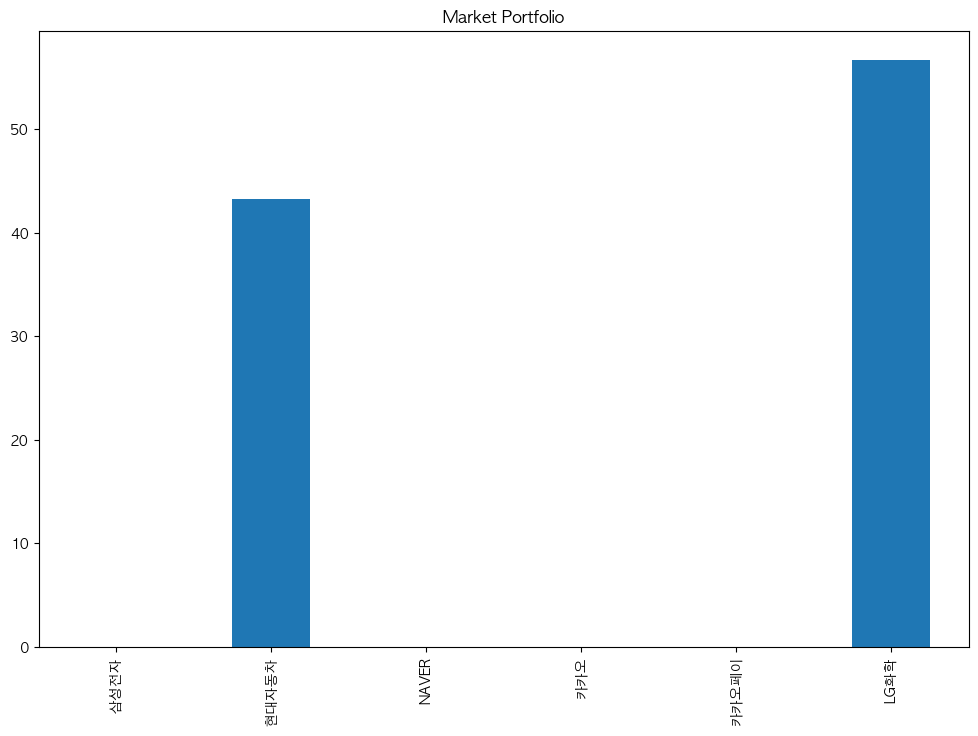

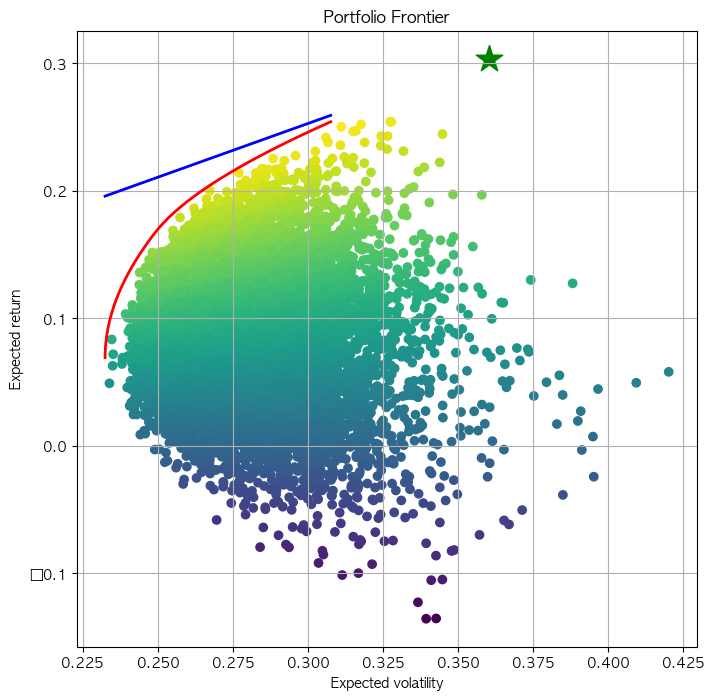

In [12]:
import module.KospiCAPM  as kc

tickers = ['삼성전자', '현대자동차', 'NAVER', '카카오', '카카오페이', 'LG화학']
capm = kc.CAPM(tickers, '2020-01-01')
capm_port = capm.get_efficient_frontier(10000)

# PortOptimizerKospi

In [13]:
import module.PortOptimizerKospi as pok

tickers = ['NAVER', '삼성전자', '현대자동차']
engine = pok.PortOptimizer(tickers, '2020-01-01')

res = engine.run(cs_model='RP', ts_model='VT', cost=0.0005)

[0.2506587128842827, 0.37010141700136967, 0.3792398701143475] ['NAVER', '삼성전자', '현대자동차']


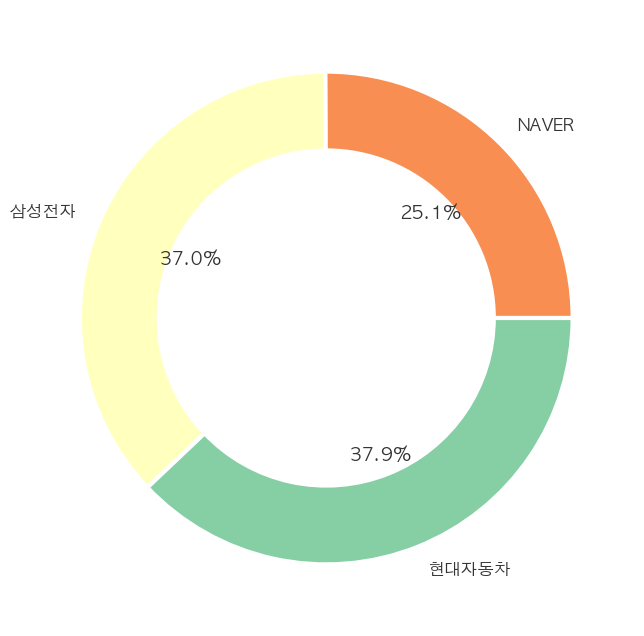

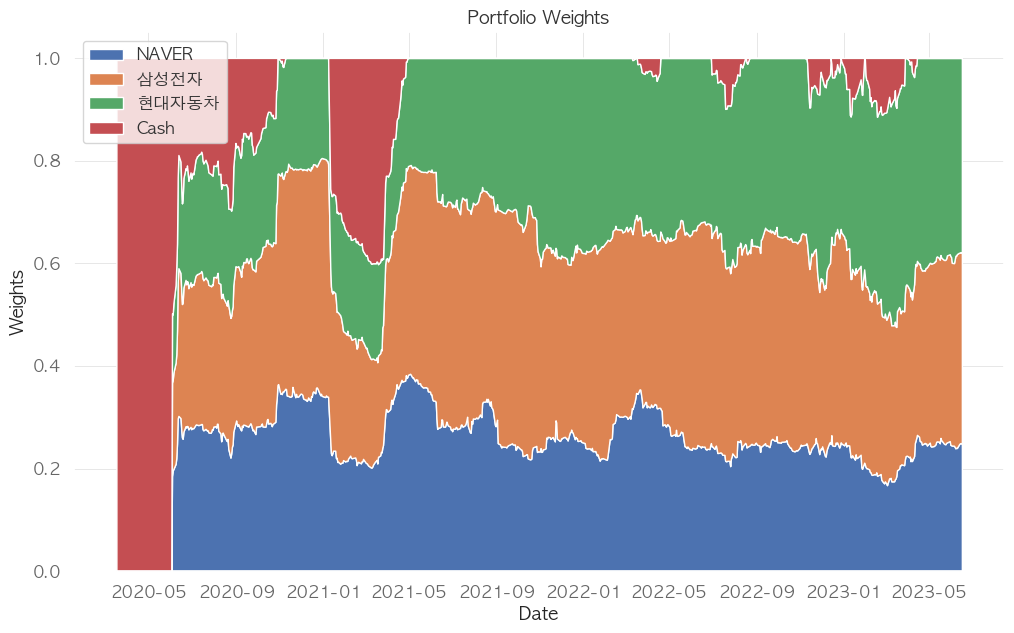

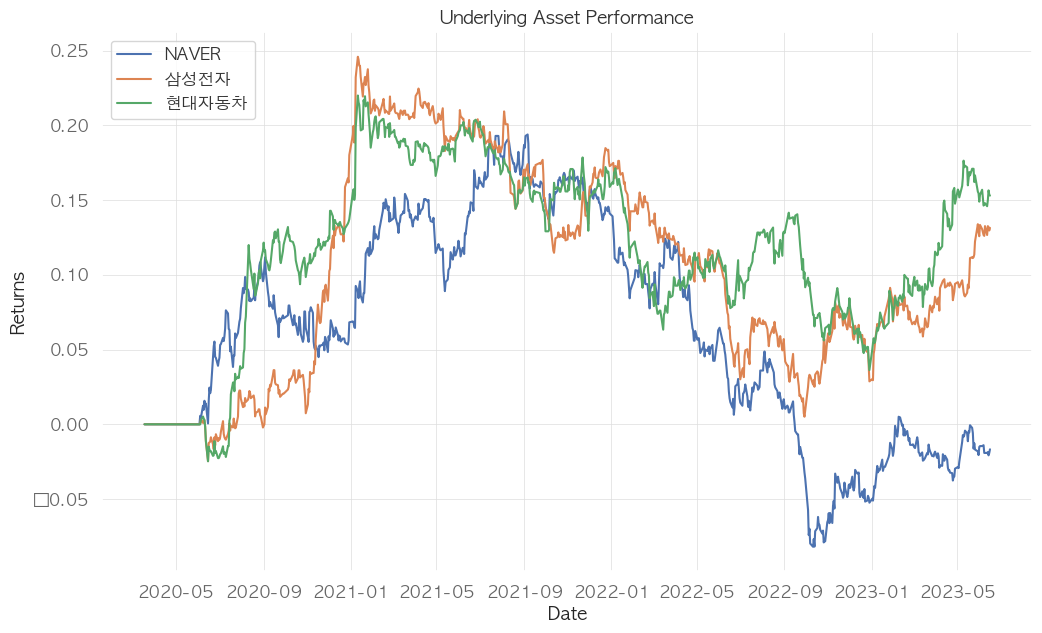

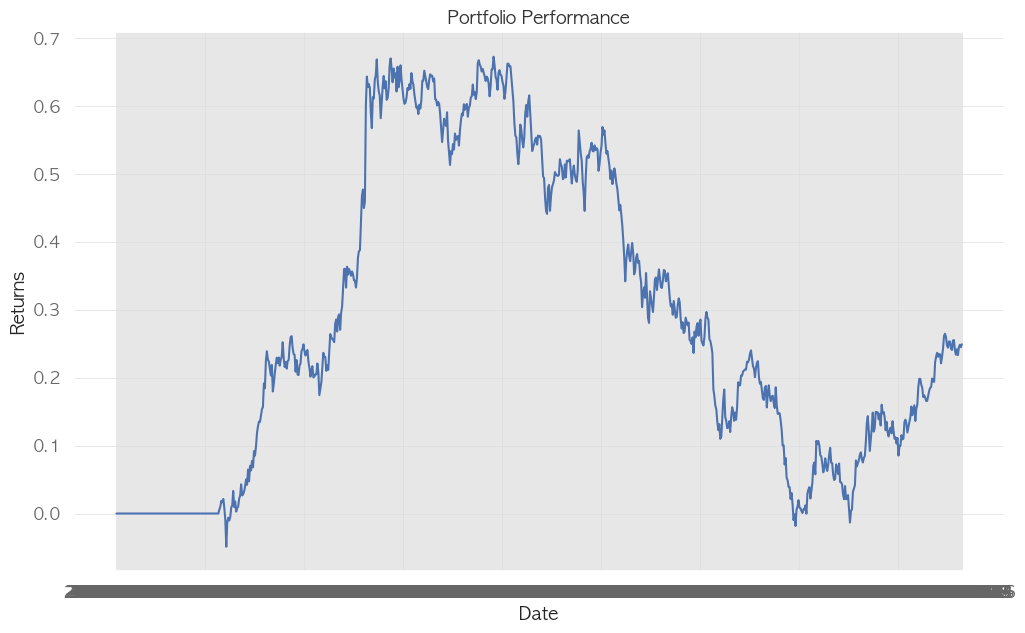

In [14]:
port_weights = res[0]
port_asset_rets = res[1]
port_rets = res[2]
weights_recent = port_weights.iloc[-1].tolist()
print(weights_recent, tickers)
engine.plot_pie_chart(weights_recent, tickers)
engine.performance_analytics(port_weights, port_asset_rets, port_rets, qs_report=True)

# Optimizing portfolio with kospi, us stock, dollars and cash

### Get portfolio prices

In [1]:
import module.GetStockPrices as GetStockPrices

# get stock prices
tickers_k = ['삼성전자', '현대자동차', 'NAVER', '카카오', '카카오페이', 'LG화학']
# tickers_k = []
tickers_u = ['AAPL', 'AMZN', 'GOOG', 'TSLA', 'NVDA', 'MSFT']

gsp = GetStockPrices.GetStockPrices(tickers_k, tickers_u, start_date='2021-01-01')

data = gsp.get_portfolio_data()

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
                  AAPL        AMZN        GOOG        MSFT        NVDA  \
date                                                                     
2021-01-04  127.503647  159.331497   86.412003  212.876663  130.862381   
2021-01-05  129.080078  160.925507   87.045998  213.081985  133.768829   
2021-01-06  124.735031  156.919006   86.764503  207.556931  125.882767   
2021-01-07  128.991394  158.108002   89.362503  213.463379  133.162628   
2021-01-08  130.104767  159.134995   90.360497  214.763947  132.491516   
...                ...         ...         ...         ...         ...   
2023-06-12  183.789993  126.570000  124.349998  331.850006  394.820007   
2023-06-13  183.309998  126.660004  124.430000  334.290009  410.220001   
2023-06-14  183.949997  126.419998  124.379997  337.339996  429.970001   
2023-06-15  186.009995  127.110001  125.790001  

### optimize portfolio

In [21]:
import module.PortOptimizer as po
import pandas as pd


engine = po.PortOptimizer(data)

res = engine.run(cs_model='RP', ts_model='VT', cost=0.0005)

### Visulaization

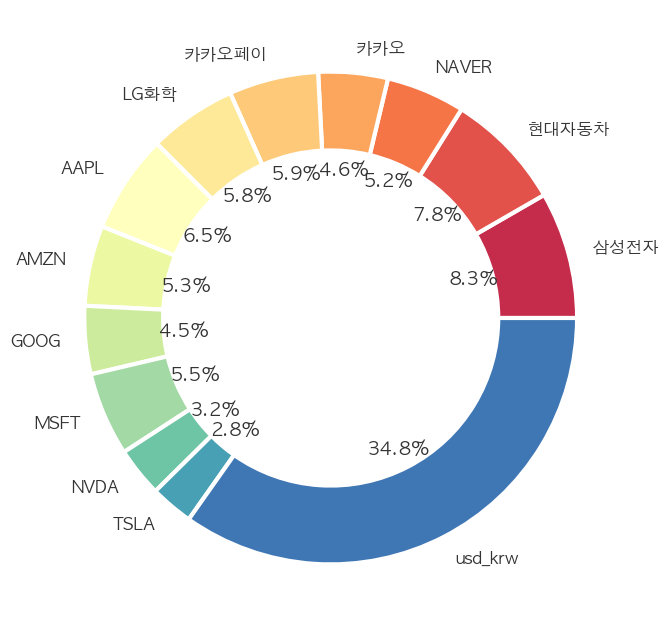

삼성전자       0.083251
현대자동차      0.077634
NAVER      0.051705
카카오        0.045542
카카오페이      0.058745
LG화학       0.057924
AAPL       0.064621
AMZN       0.052654
GOOG       0.044651
MSFT       0.054861
NVDA       0.032454
TSLA       0.028237
usd_krw    0.347721
Name: 2023-06-16, dtype: float64


In [22]:
port_weights = res[0]
port_asset_rets = res[1]
port_rets = res[2]
weights_recent = port_weights.iloc[-1]
engine.plot_pie_chart(weights_recent.values, weights_recent.index.tolist())
print(weights_recent)

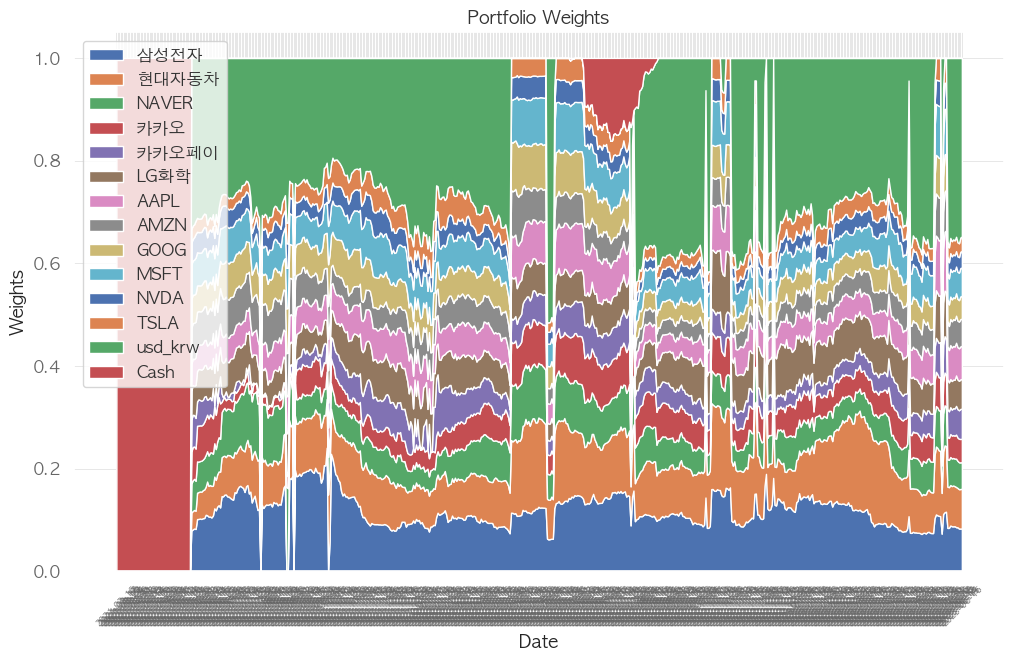

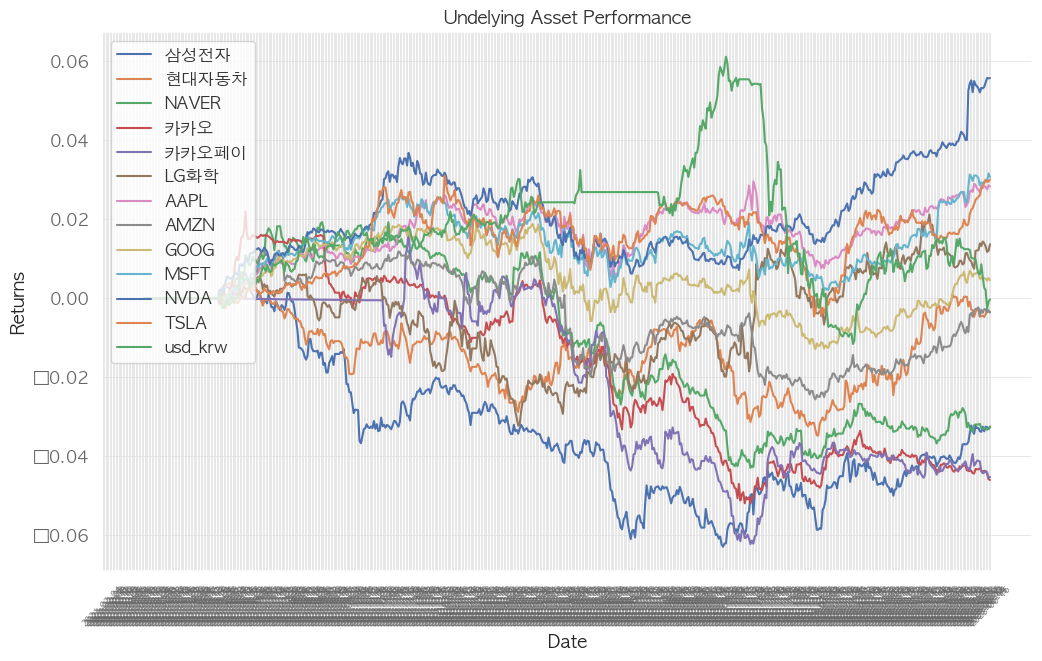

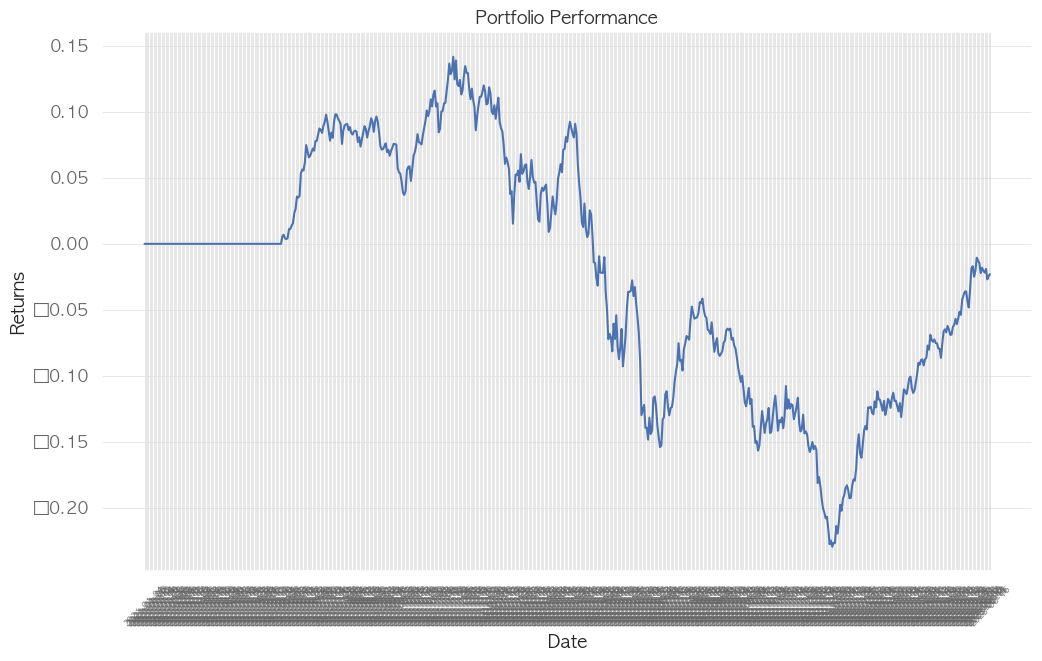

In [23]:
engine.performance_analytics(port_weights, port_asset_rets, port_rets, qs_report=True)

# GetUSIndex

In [1]:
import module.GetUSIndex as GetUSIndex

data = GetUSIndex.get_index_data()
data


start = ^DJI, dow_jones
end = ^DJI, dow_jones
start = ^GSPC, s&p_500
end = ^GSPC, s&p_500
start = ^IXIC, nasdaq
end = ^IXIC, nasdaq
start = ^RUT, russell_2000
end = ^RUT, russell_2000
start = XLK, information_technology
end = XLK, information_technology
start = XLV, health_care
end = XLV, health_care
start = XLY, consumer_discretionary
end = XLY, consumer_discretionary
start = XLP, consumer_staples
end = XLP, consumer_staples
start = XLE, energy
end = XLE, energy
start = XLF, financials
end = XLF, financials
start = XLI, industrials
end = XLI, industrials
start = XLB, materials
end = XLB, materials
start = XLRE, real_estate
end = XLRE, real_estate
start = XLU, utilities
end = XLU, utilities
           index_name  code    open     high      low   close    volume  \
date                                                                      
1992-01-02  dow_jones  ^DJI  3152.1  3172.63  3139.31  3172.4  23550000   
1992-01-03  dow_jones  ^DJI  3172.4  3210.64  3165.92  3201.5  23620000   


,index_name,code,open,high,low,close,volume,dividends,stock_splits,Capital Gains
date,,,,,,,,,,
1992-01-02,dow_jones,^DJI,3152.10,3172.63,3139.31,3172.40,23550000,0.0,0.0,NaN
1992-01-03,dow_jones,^DJI,3172.40,3210.64,3165.92,3201.50,23620000,0.0,0.0,NaN
1992-01-06,dow_jones,^DJI,3201.50,3213.33,3191.86,3200.10,27280000,0.0,0.0,NaN
1992-01-07,dow_jones,^DJI,3200.10,3210.20,3184.48,3204.80,25510000,0.0,0.0,NaN
1992-01-08,dow_jones,^DJI,3204.80,3229.20,3185.82,3203.90,29040000,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-12,utilities,XLU,66.44,66.62,66.00,66.27,11483700,0.0,0.0,0.0
2023-06-13,utilities,XLU,65.87,66.49,65.76,66.26,11868600,0.0,0.0,0.0
2023-06-14,utilities,XLU,66.50,67.01,66.09,66.22,14023600,0.0,0.0,0.0
